In [3]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [4]:
# Load the dataset and view the basic structure
data = pd.read_csv('german_credit_data.csv')
print(data.info())
print(data.head(15))
'''
This is a dataset of German loan borrowers. The information contained within the set relates to 
Individual characteristics (Sex, age, housing), account information (checking and savings account balance level), 
and loan information (purpose, duration, amount, and risk assessment). The majority of the data is categorical in nature and will
be converted to numerical identifiers later on for correlation analysis. The Job column is numerical in nature, but information from the source
of the dataset informs that it is actually categorical (0 - unskilled non-resident, 1 - unskilled resident, 2 - skilled, 3 - highly skilled)
This will only be reflected in visualizations, but otherwise will remain in numerical format. 
There is one arbitrary indexing column that is unnamed and unnecessary, and will be dropped. 
Additionally, the only columns which contain null values are Savings and Checking. I will not be dropping these records.
Instead, I will be using an imputation method to fill them. This is discussed later. 
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None
    Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0            0   67    male    2     own             NaN           little   
1            1   22  female    2     own          little         moderate   
2        

'\nThis is a dataset of German loan borrowers. The information contained within the set relates to \nIndividual characteristics (Sex, age, housing), account information (checking and savings account balance level), \nand loan information (purpose, duration, amount, and risk assessment). The majority of the data is categorical in nature and will\nbe converted to numerical identifiers later on for correlation analysis. The Job column is numerical in nature, but information from the source\nof the dataset informs that it is actually categorical (0 - unskilled non-resident, 1 - unskilled resident, 2 - skilled, 3 - highly skilled)\nThis will only be reflected in visualizations, but otherwise will remain in numerical format. \nThere is one arbitrary indexing column that is unnamed and unnecessary, and will be dropped. \nAdditionally, the only columns which contain null values are Savings and Checking. I will not be dropping these records.\nInstead, I will be using an imputation method to fil

In [5]:
# Drop the unnecessary 'unnamed column'
data.drop(columns='Unnamed: 0', inplace=True)

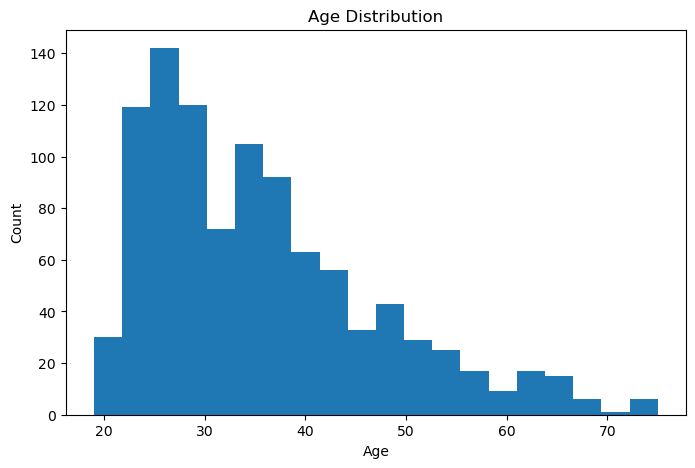

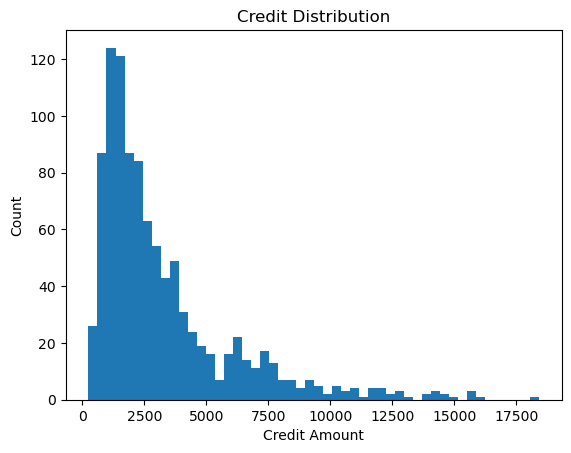

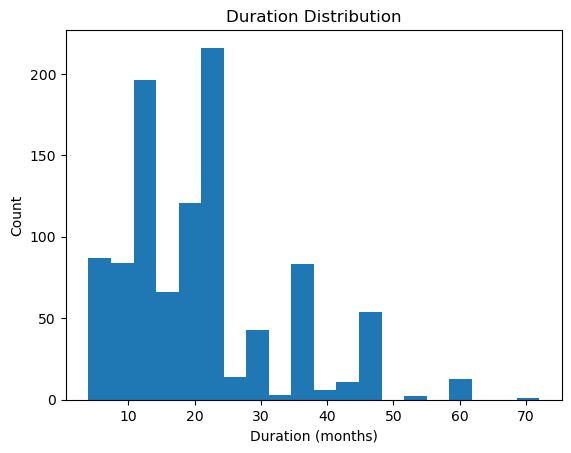

Age central tendency and quantiles
count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64
Median: 33.0
Mode: 27

Credit Amount central tendency and quantiles
count     1000.000000
mean      3271.258000
std       2822.736876
min        250.000000
25%       1365.500000
50%       2319.500000
75%       3972.250000
max      18424.000000
Name: Credit amount, dtype: float64
Median: 2319.5
Mode: 1478

Duration central tendency and quantiles
count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64
Median: 18.0
Mode: 24


' \nEvery distribution is skewed to the right\nThe highest frequency of individuals falls within the 20-35 age range.\nMost individuals take credit amounts lower than 5000.\nThe frequency decreases significantly for higher credit amounts, with a long tail extending towards larger amounts.\nThe most frequent loan durations are around 12 and 24 months.\n'

In [6]:
'''The following sections will be visualizing relationships within the data'''
# Create and view histograms for both age and loan (credit) amount and duration. I specified bin sizes to better see the shape of the distributions,
# identify ouliers, and data density. 
plt.figure(figsize=[8, 5])
plt.hist(data=data, x='Age', bins=20)
plt.xlabel('Age'), plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

plt.hist(data=data, x='Credit amount', bins=50)
plt.xlabel('Credit Amount'), plt.ylabel('Count')
plt.title('Credit Distribution')
plt.show()

plt.hist(data=data, x='Duration', bins=20)
plt.xlabel('Duration (months)'), plt.ylabel('Count')
plt.title('Duration Distribution')
plt.show()

# Determine the modes for both each distribution
age_mode = data['Age'].value_counts().reset_index(name='count')
credit_mode = data['Credit amount'].value_counts().reset_index(name='count')
duration_mode = data['Duration'].value_counts().reset_index(name='count')

# Create lists to contain central tendendcy data for iteration purposes and better display
age_ctl = ['Age central tendency and quantiles', data['Age'].describe(), f"Median: {data['Age'].median()}", f"Mode: {age_mode.iloc[0, 0]}"]
credit_ctl = ['Credit Amount central tendency and quantiles', data['Credit amount'].describe(), 
      f"Median: {data['Credit amount'].median()}", f"Mode: {credit_mode.iloc[0, 0]}"]
duration_ctl = ['Duration central tendency and quantiles', data['Duration'].describe(), 
      f"Median: {data['Duration'].median()}", f"Mode: {duration_mode.iloc[0, 0]}"]

for info in age_ctl:
    print(info)
    
print()

for info in credit_ctl:
    print(info)

print()

for info in duration_ctl:
    print(info)
''' 
Every distribution is skewed to the right
The highest frequency of individuals falls within the 20-35 age range.
Most individuals take credit amounts lower than 5000.
The frequency decreases significantly for higher credit amounts, with a long tail extending towards larger amounts.
The most frequent loan durations are around 12 and 24 months.
'''

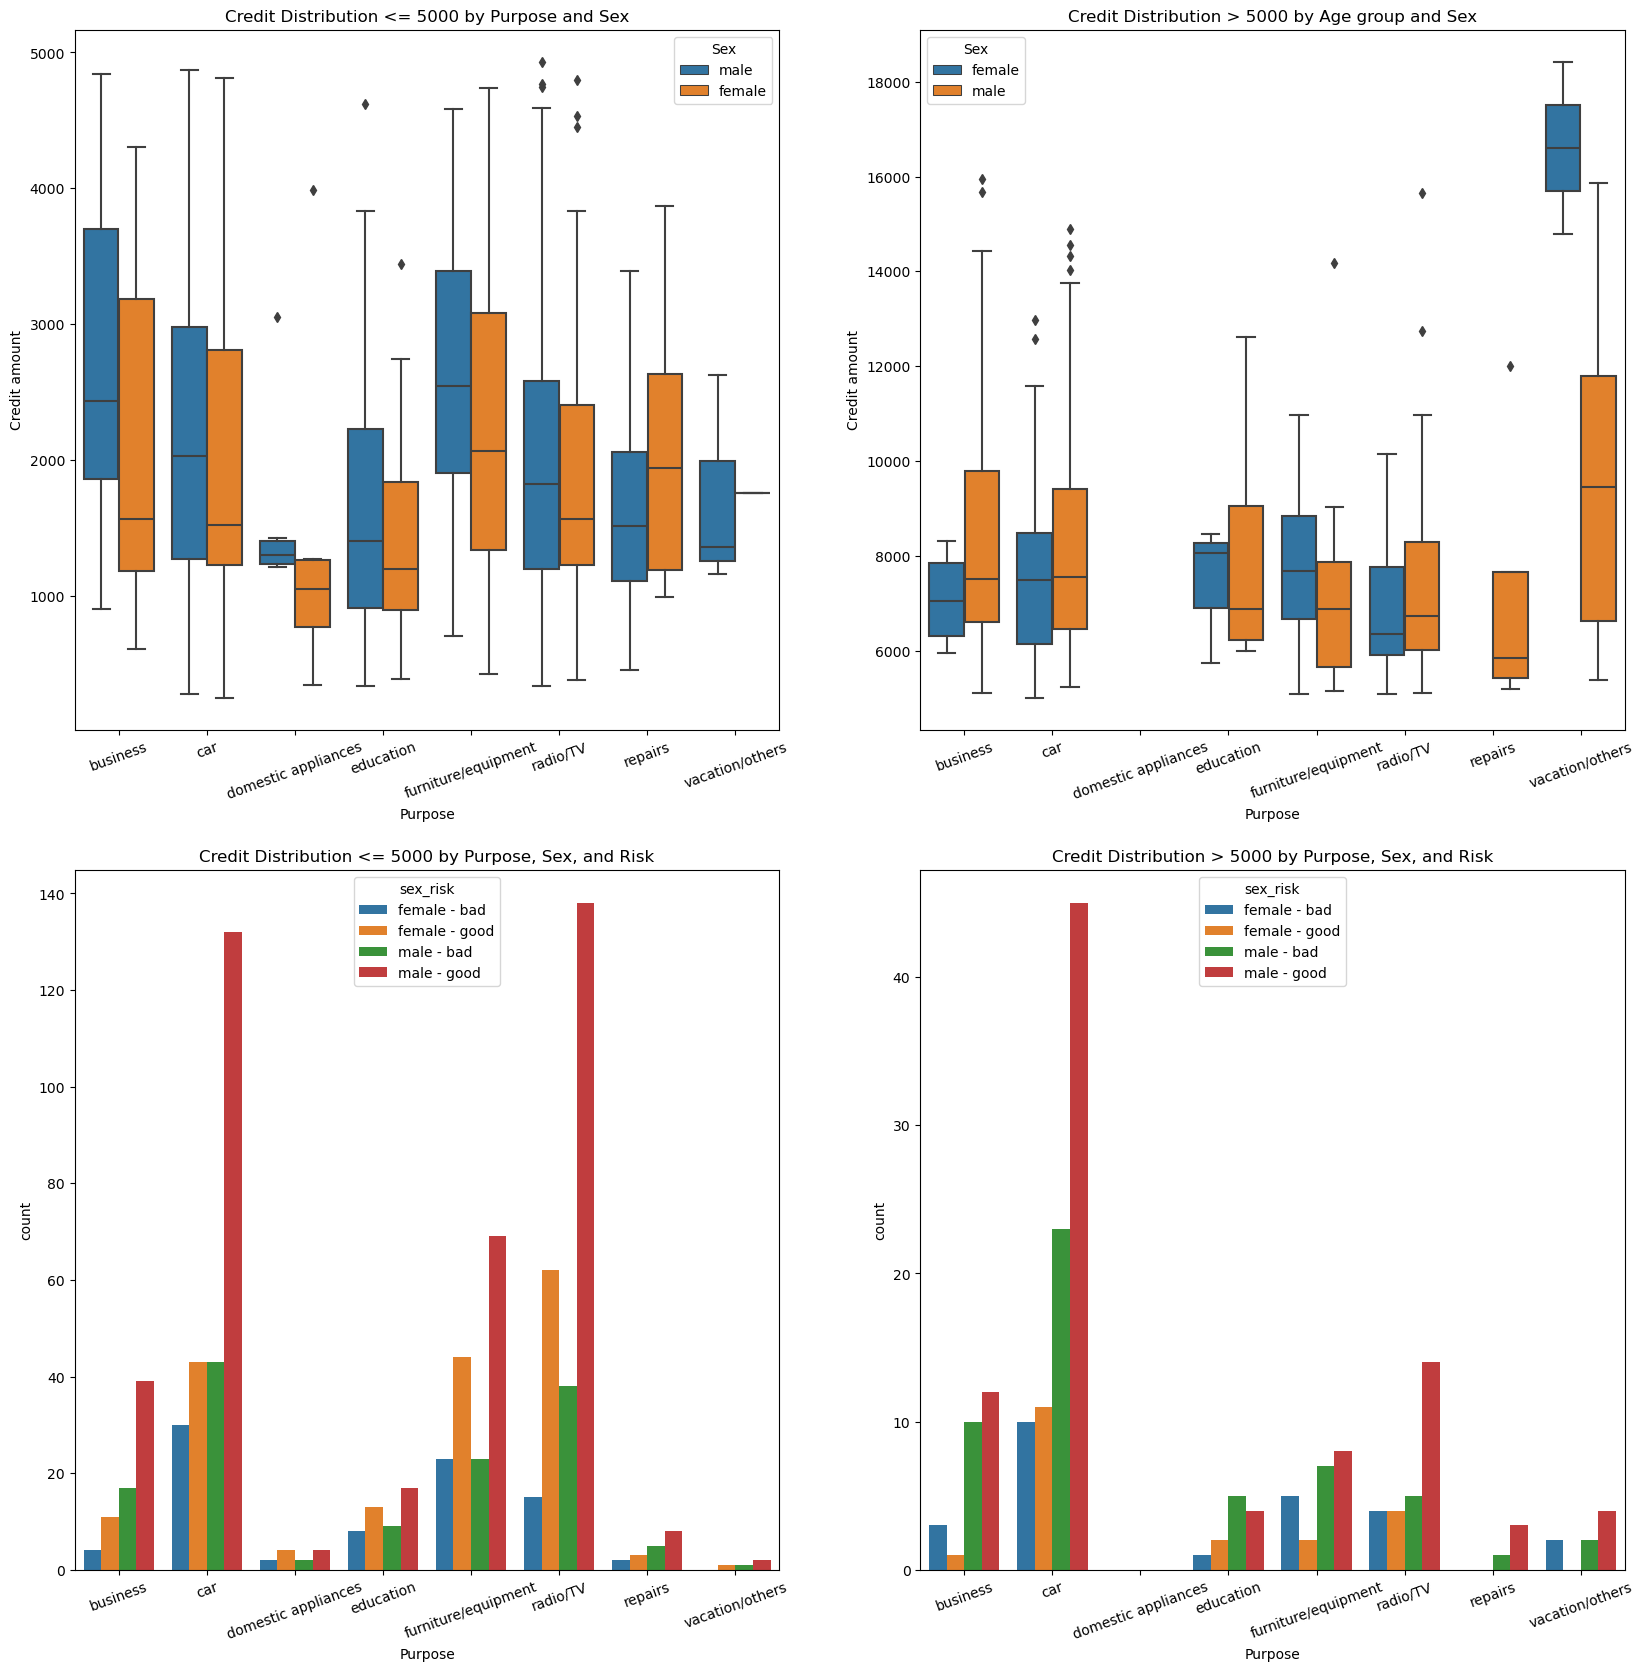

'\nMales tend to take out higher credit amounts compared to females across most purposes.\nThe variability in credit amounts is greater for males, indicated by the wider interquartile ranges in box plots.\nMales with good credit risk are the most frequent borrowers across both lower and higher credit amounts.\nFemales and individuals with bad credit risk are less frequent in higher credit amount categories.\nCars and radios/TV are common purposes for taking out credit, especially among males with good credit risk.\nEducation shows lower credit amounts for females and more balanced credit distribution between sexes for higher amounts.\nThere are notable outliers in higher credit amounts, particularly for purposes like vacation/others.\n'

In [7]:
# Create subplots to view Credit amount in relation to Purpose, Sex, and Risk assessment 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[20, 20])

sns.boxplot(data=data[data['Credit amount'] <= 5000], x='Purpose', y='Credit amount', hue='Sex', order=sorted(data['Purpose'].unique()), ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=20)
axes[0, 0].set_title('Credit Distribution <= 5000 by Purpose and Sex')

sns.boxplot(data=data[data['Credit amount'] > 5000], x='Purpose', y='Credit amount', hue='Sex', order=sorted(data['Purpose'].unique()), ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=20)
axes[0, 1].set_title('Credit Distribution > 5000 by Age group and Sex')

data['sex_risk'] = data['Sex'] + ' - ' + data['Risk']

grouped = data[data['Credit amount'] <= 5000].groupby(['Purpose', 'sex_risk']).size().reset_index(name='count')
sns.barplot(data=grouped, x='Purpose', y='count', hue='sex_risk', order=sorted(data['Purpose'].unique()), ax=axes[1, 0])
axes[1, 0].tick_params(axis='x', rotation=20)
axes[1, 0].set_title('Credit Distribution <= 5000 by Purpose, Sex, and Risk')

grouped = data[data['Credit amount'] > 5000].groupby(['Purpose', 'sex_risk']).size().reset_index(name='count')
sns.barplot(data=grouped, x='Purpose', y='count', hue='sex_risk', order=sorted(data['Purpose'].unique()), ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=20)
axes[1, 1].set_title('Credit Distribution > 5000 by Purpose, Sex, and Risk')

plt.show()

'''
Males tend to take out higher credit amounts compared to females across most purposes.
The variability in credit amounts is greater for males, indicated by the wider interquartile ranges in box plots.
Males with good credit risk are the most frequent borrowers across both lower and higher credit amounts.
Females and individuals with bad credit risk are less frequent in higher credit amount categories.
Cars and radios/TV are common purposes for taking out credit, especially among males with good credit risk.
Education shows lower credit amounts for females and more balanced credit distribution between sexes for higher amounts.
There are notable outliers in higher credit amounts, particularly for purposes like vacation/others.
'''

C:\Users\ephar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ephar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ephar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

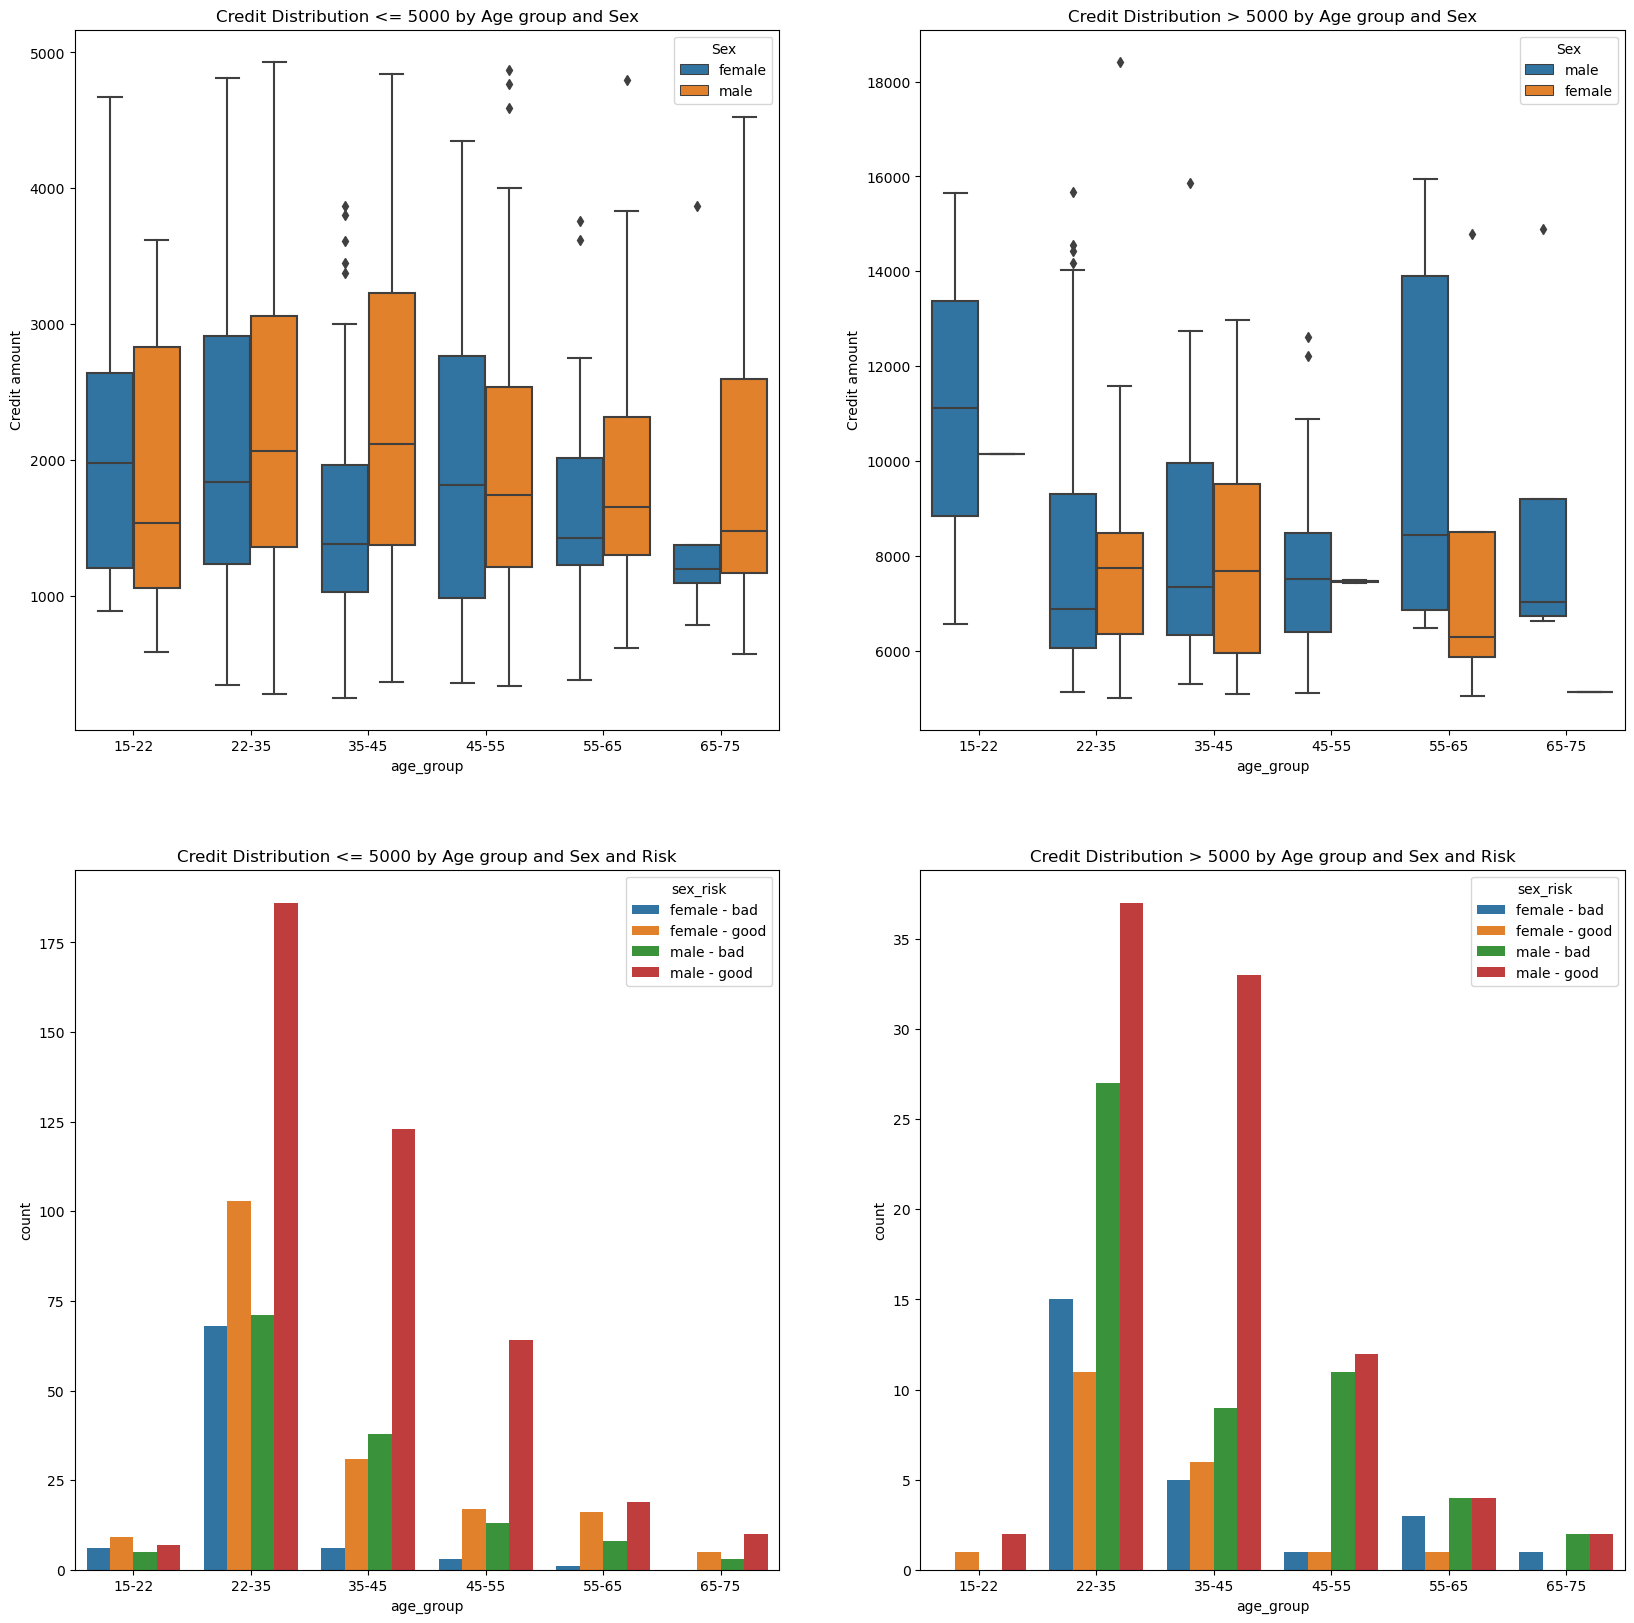

'\nYounger age groups (15-22) and older age groups (65-75) have fewer credit instances, with lower variability in credit amounts.\nMiddle age groups (22-35 and 35-45) are more active in taking credit, showing higher variability and median values in credit amounts.\nMales generally dominate the number of credit instances, especially in the middle age groups.\nFemales are more present in the 22-35 and 35-45 age groups, particularly in lower credit amounts.\nMales with good credit risk are the predominant group across both lower and higher credit amounts.\nFemales with good credit risk have a noticeable presence but are less frequent compared to males.\nIndividuals with bad credit risk (both males and females) have fewer instances of higher credit amounts.\nOutliers in credit amounts are present in several age groups, indicating significant variances in credit behavior for these categories.\n'

In [8]:
# Create subplots to view Credit amount in relation to Age groups, Sex, and Risk assessment 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[20, 20])

# Define age bins and labels
age_bins = [15, 22, 35, 45, 55, 65, 76]
age_labels = ['15-22', '22-35', '35-45', '45-55', '55-65', '65-75']
data['age_group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)
data.sort_values(by='age_group', inplace=True)

sns.boxplot(data=data[data['Credit amount'] <= 5000], x='age_group', y='Credit amount', hue='Sex', ax=axes[0, 0])
axes[0, 0].set_title('Credit Distribution <= 5000 by Age group and Sex')

sns.boxplot(data=data[data['Credit amount'] > 5000], x='age_group', y='Credit amount', hue='Sex', ax=axes[0, 1])
axes[0, 1].set_title('Credit Distribution > 5000 by Age group and Sex')

grouped = data[data['Credit amount'] <= 5000].groupby(['age_group', 'sex_risk']).size().reset_index(name='count')
sns.barplot(data=grouped, x='age_group', y='count', hue='sex_risk', ax=axes[1, 0])
axes[1, 0].set_title('Credit Distribution <= 5000 by Age group and Sex and Risk')

grouped = data[data['Credit amount'] > 5000].groupby(['age_group', 'sex_risk']).size().reset_index(name='count')
sns.barplot(data=grouped, x='age_group', y='count', hue='sex_risk', ax=axes[1, 1])
axes[1, 1].set_title('Credit Distribution > 5000 by Age group and Sex and Risk')

plt.show()
'''
Younger age groups (15-22) and older age groups (65-75) have fewer credit instances, with lower variability in credit amounts.
Middle age groups (22-35 and 35-45) are more active in taking credit, showing higher variability and median values in credit amounts.
Males generally dominate the number of credit instances, especially in the middle age groups.
Females are more present in the 22-35 and 35-45 age groups, particularly in lower credit amounts.
Males with good credit risk are the predominant group across both lower and higher credit amounts.
Females with good credit risk have a noticeable presence but are less frequent compared to males.
Individuals with bad credit risk (both males and females) have fewer instances of higher credit amounts.
Outliers in credit amounts are present in several age groups, indicating significant variances in credit behavior for these categories.
'''

In [9]:
# Change the values for the Job column to reflect descriptive categorical values
for i in range(len(data['Job'])):
    match data.loc[i, 'Job']:
        case 0:
            data.loc[i, 'Job'] = 'Unskilled non-resident'
        case 1:
            data.loc[i, 'Job'] = 'Unskilled resident'
        case 2:
            data.loc[i, 'Job'] = 'Skilled'
        case 3:
            data.loc[i, 'Job'] = 'Highly skilled'


C:\Users\ephar\AppData\Local\Temp\ipykernel_19536\1352671814.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Skilled' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[i, 'Job'] = 'Skilled'


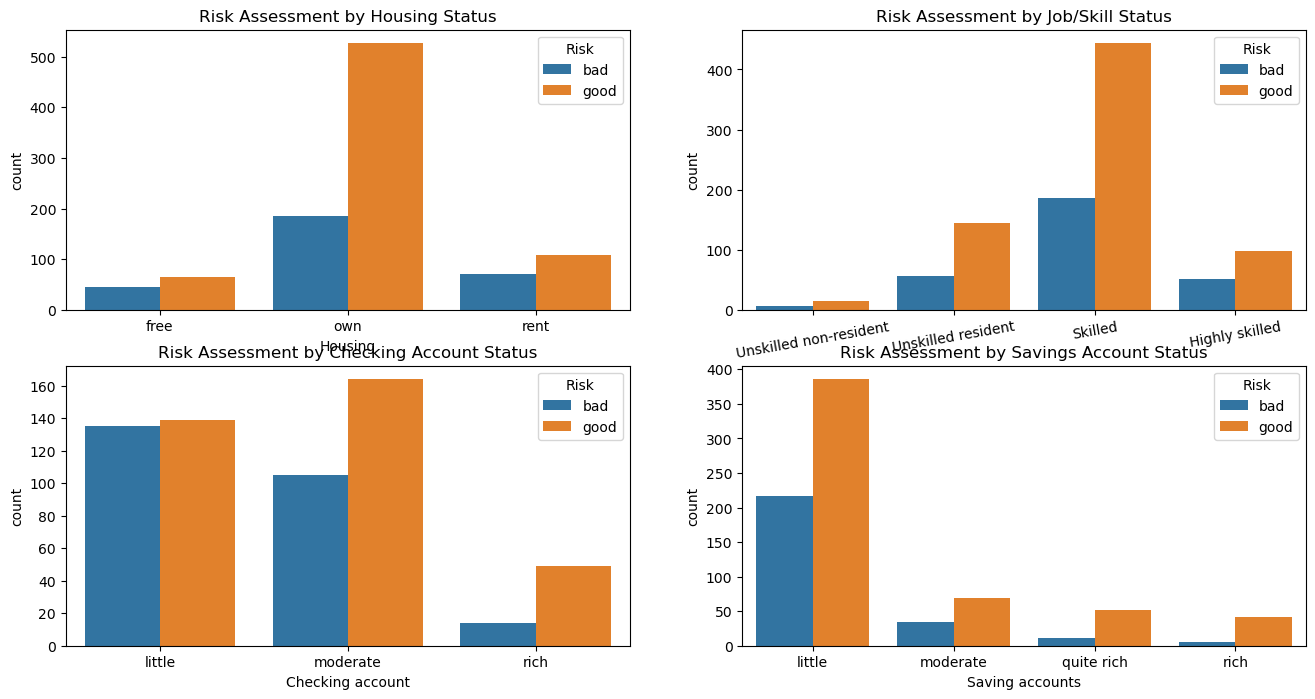

'\nIndividuals who "own" houses are more likely to have good credit risk.\nSkilled workers are more likely to have good credit risk.\nHighly skilled borrowers have a higher percentage of bad to good risk loans.\nIndividuals with "moderate" or "rich" checking accounts are more likely to have good credit risk.\nIndividuals with "little" saving accounts have the highest number of instances, with good credit risks significantly higher, \nbut the percentage of bad to good risk loans is also the highest.\n'

In [10]:
# Create subplots to view Housing, Job status, Checking and Savings level with Risk assessment 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[16, 8])
grouped = data.groupby(['Housing', 'Risk']).size().reset_index(name='count')
sns.barplot(data=grouped, x='Housing', y='count', hue='Risk', ax=axes[0, 0])
axes[0, 0].set_title('Risk Assessment by Housing Status')

grouped = data.groupby(['Job', 'Risk']).size().reset_index(name='count')
sns.barplot(data=grouped, x='Job', y='count', hue='Risk', order=['Unskilled non-resident', 'Unskilled resident','Skilled', 'Highly skilled'], ax=axes[0, 1])
axes[0, 1].tick_params(axis='x', rotation=10)
axes[0, 1].set_title('Risk Assessment by Job/Skill Status')

grouped = data.groupby(['Checking account', 'Risk']).size().reset_index(name='count')
sns.barplot(data=grouped, x='Checking account', y='count', hue='Risk', ax=axes[1, 0])
axes[1, 0].set_title('Risk Assessment by Checking Account Status')

grouped = data.groupby(['Saving accounts', 'Risk']).size().reset_index(name='count')
sns.barplot(data=grouped, x='Saving accounts', y='count', hue='Risk', ax=axes[1, 1])
axes[1, 1].set_title('Risk Assessment by Savings Account Status')

plt.show()
'''
Individuals who "own" houses are more likely to have good credit risk.
Skilled workers are more likely to have good credit risk.
Highly skilled borrowers have a higher percentage of bad to good risk loans.
Individuals with "moderate" or "rich" checking accounts are more likely to have good credit risk.
Individuals with "little" saving accounts have the highest number of instances, with good credit risks significantly higher, 
but the percentage of bad to good risk loans is also the highest.
'''

C:\Users\ephar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ephar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\ephar\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

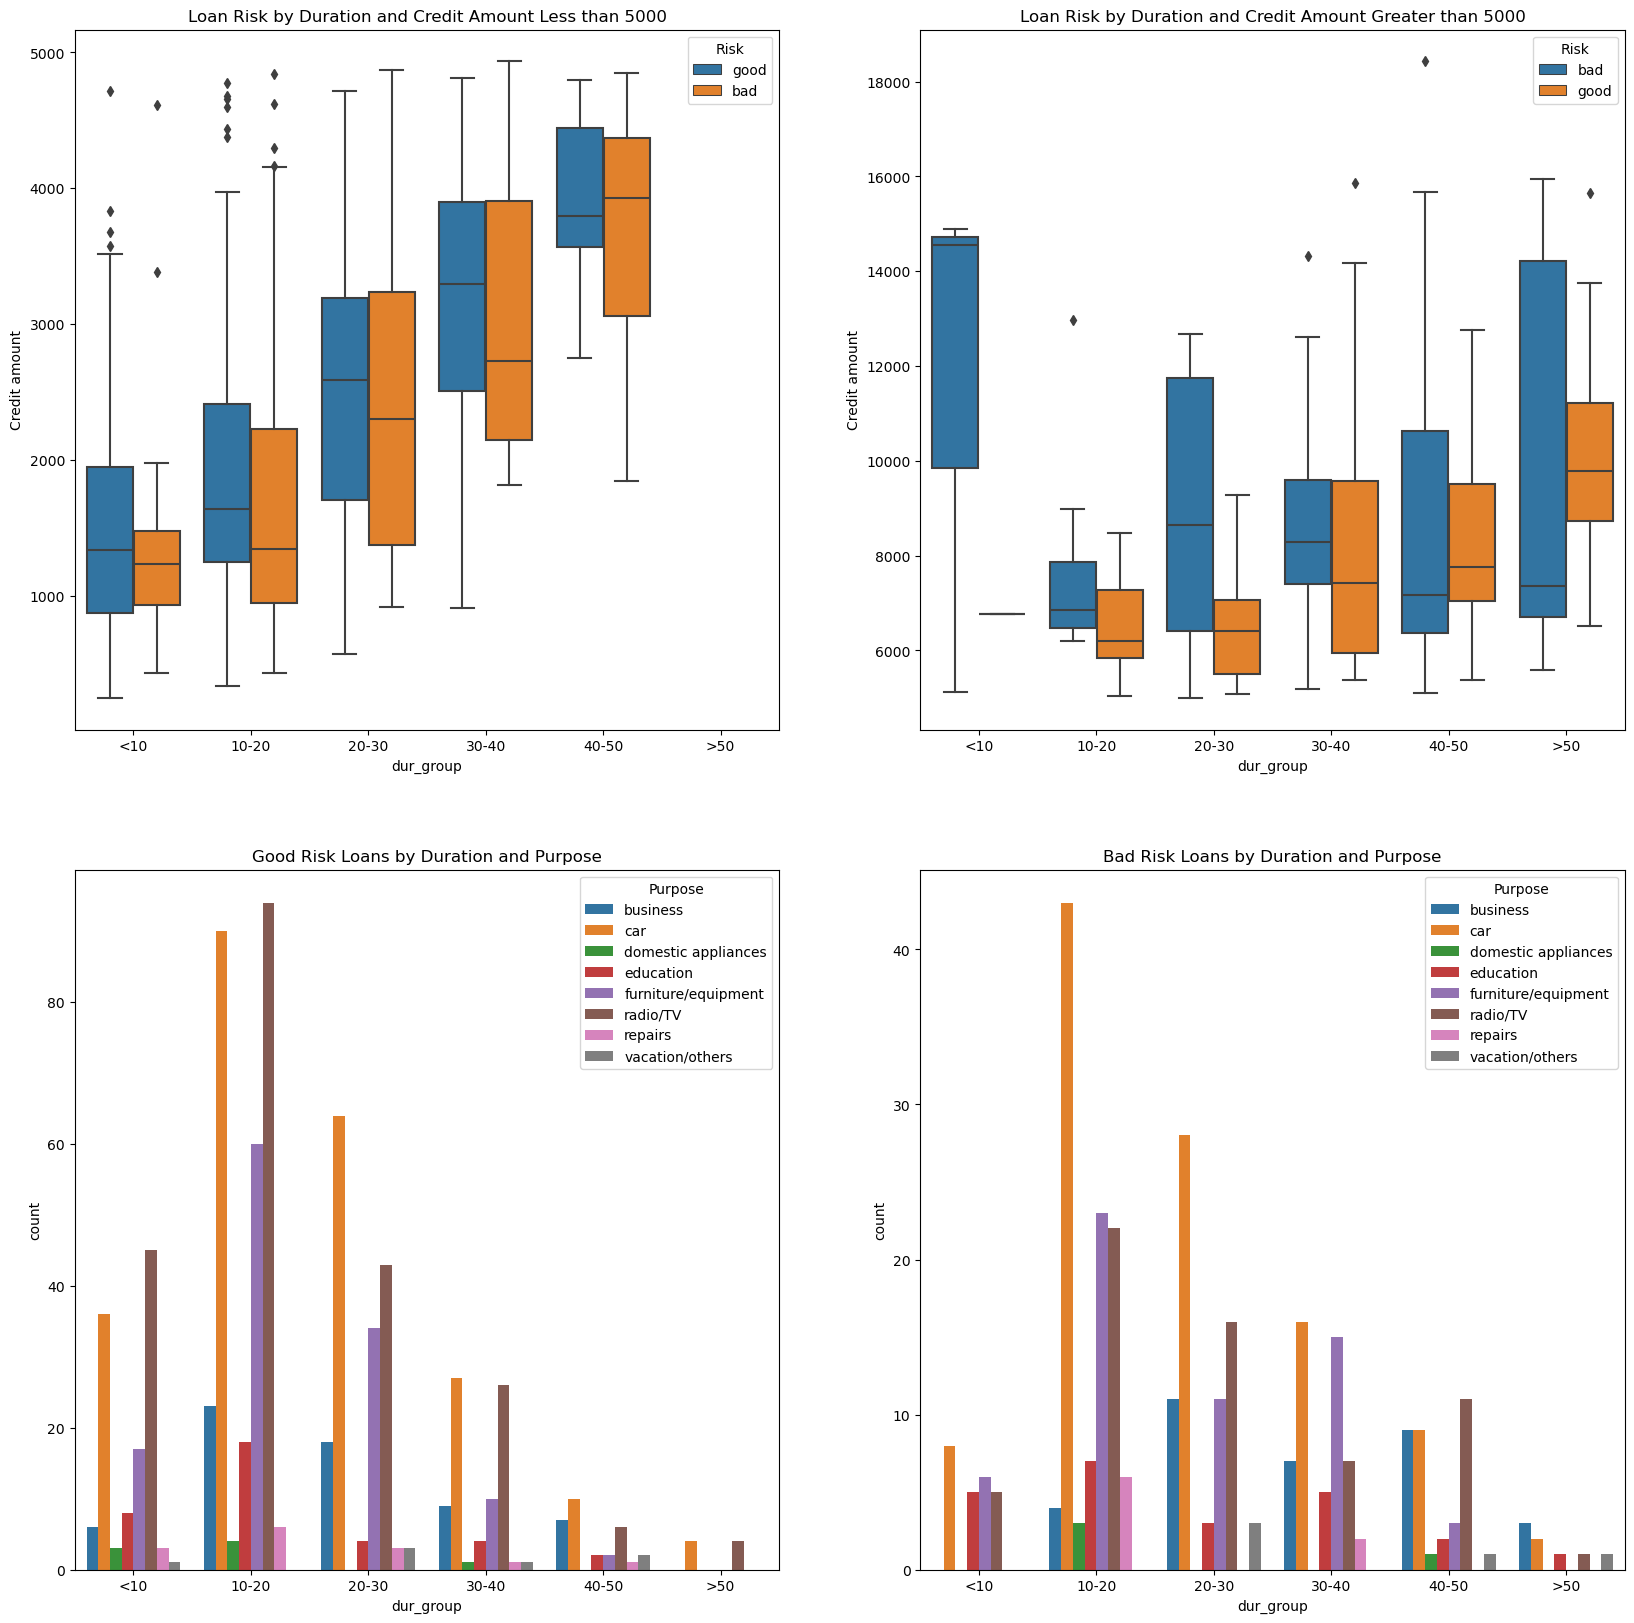

'\nAs the duration increases, the median credit amount also increases for both risk categories, with a noticeable difference between the two.\nThe distribution is wider for good risks in most duration groups, with several outliers, particularly in longer durations.\nCompared to good risk loans, bad risk loans have fewer instances overall, with fewer loan purposes represented.\nCar and radio/TV loans are the most common purposes for both good and bad risk loans.\nGood risk loans have a higher count and more diverse purposes compared to bad risk loans.\nThere are notable outliers in the credit amounts for good risk loans, especially for higher amounts and longer durations.\nBad risk loans have fewer outliers and a narrower distribution overall.\n'

In [11]:
# Create subplots to view loan duration in relation to Credit amount, Purpose, and Risk assessment 
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=[20, 20])

# Define age bins and labels
dur_bins = [0, 10, 20, 30, 40, 50, 73]
dur_labels = ['<10', '10-20', '20-30', '30-40', '40-50', '>50']
data['dur_group'] = pd.cut(data['Duration'], bins=dur_bins, labels=dur_labels, right=False)
data.sort_values(by='dur_group', inplace=True)

sns.boxplot(data=data[data['Credit amount'] <= 5000], x='dur_group', y='Credit amount', hue='Risk', ax=axes[0, 0])
axes[0, 0].set_title('Loan Risk by Duration and Credit Amount Less than 5000')

sns.boxplot(data=data[data['Credit amount'] > 5000], x='dur_group', y='Credit amount', hue='Risk', ax=axes[0, 1])
axes[0, 1].set_title('Loan Risk by Duration and Credit Amount Greater than 5000')

grouped = data[data['Risk'] == 'good'].groupby(['dur_group', 'Purpose']).size().reset_index(name='count')
sns.barplot(data=grouped, x='dur_group', y='count', hue='Purpose', ax=axes[1, 0])
axes[1, 0].set_title('Good Risk Loans by Duration and Purpose')

grouped = data[data['Risk'] == 'bad'].groupby(['dur_group', 'Purpose']).size().reset_index(name='count')
sns.barplot(data=grouped, x='dur_group', y='count', hue='Purpose', ax=axes[1, 1])
axes[1, 1].set_title('Bad Risk Loans by Duration and Purpose')

plt.show()

'''
As the duration increases, the median credit amount also increases for both risk categories, with a noticeable difference between the two.
The distribution is wider for good risks in most duration groups, with several outliers, particularly in longer durations.
Compared to good risk loans, bad risk loans have fewer instances overall, with fewer loan purposes represented.
Car and radio/TV loans are the most common purposes for both good and bad risk loans.
Good risk loans have a higher count and more diverse purposes compared to bad risk loans.
There are notable outliers in the credit amounts for good risk loans, especially for higher amounts and longer durations.
Bad risk loans have fewer outliers and a narrower distribution overall.
'''

In [12]:
# Create dictionaries for categorical encoding
pur_dict = {x: ind for ind, x in enumerate(data['Purpose'].unique(), 1)}
house_dict = {x: ind for ind, x in enumerate(data['Housing'].unique(), 1)}
acc_dict = {x: ind for ind, x in enumerate(data['Saving accounts'].unique(), 1)}
sex_dict = {x: ind for ind, x in enumerate(data['Sex'].unique(), 1)}
job_dict = {x: ind for ind, x in enumerate(data['Job'].unique(), 1)}
risk_dict = {'good': 1, 'bad': 0}


# Convert categorical columns to numerical
def convert_col(col_name, d, dataframe):
    dataframe[col_name] = dataframe[col_name].map(d)


convert_col('Housing', house_dict, data)
convert_col('Saving accounts', acc_dict, data)
convert_col('Checking account', acc_dict, data)
convert_col('Purpose', pur_dict, data)
convert_col('Risk', risk_dict, data)
convert_col('Sex', sex_dict, data)
convert_col('Job', job_dict, data)


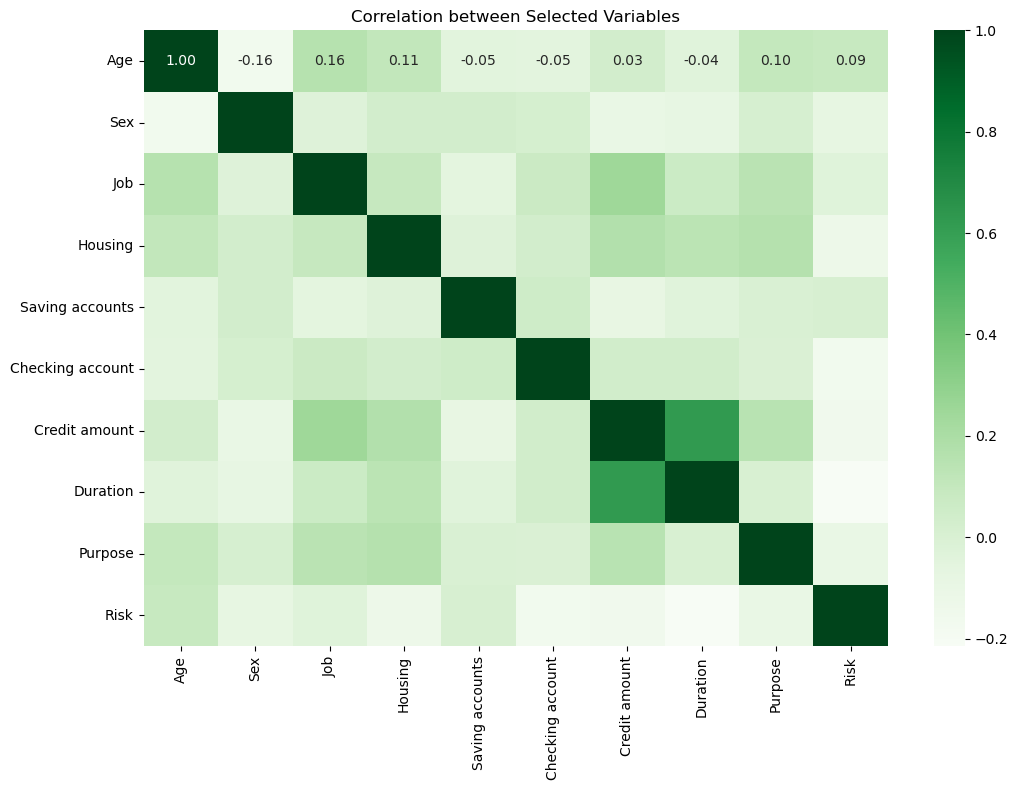

'\nCredit amount and Duration showed the highest correlation, followed by Age and Housing. Everything else paired weakly meaning there \nis not much else that has a strong linear relationship.\n'

In [13]:
# create a copy of the dataset for manipulation while maintaining the original's integrity
corr_df = data.drop(columns=['sex_risk', 'age_group', 'dur_group']).copy()

# Generate and view a correlation matrix
corr_matrix = corr_df.corr()
plt.figure(figsize=[12, 8])
sns.heatmap(corr_matrix, annot=True, cmap='Greens', fmt='.2f')
plt.title('Correlation between Selected Variables')
plt.show()

'''
Credit amount and Duration showed the highest correlation, followed by Age and Housing. Everything else paired weakly meaning there 
is not much else that has a strong linear relationship.
'''

In [15]:
''' This cell and the next will perform Data Prepcoressing & Feature Engineering'''
# create a copy of the dataset for manipulation while maintaining the original's integrity
df = data.copy()

# Remove rows with NA values
df_nn = df.dropna(subset=['Saving accounts', 'Checking account']).reset_index()


# This is a function to calculate fill values based on age group
def get_fill_values(col_to_fill, age_groups):
    # group the supplied data column by the age groups generated earlier
    grp = df_nn.groupby('age_group')[col_to_fill]
    # get the count of each categorical instance within each age_group, then convert from groupby object to dataframe for index slicing
    mode_grp = grp.value_counts().reset_index()
    # Make a list containing the mode of each age group
    mode = [mode_grp.loc[i, col_to_fill] for i in range(0, len(mode_grp), mode_grp[col_to_fill].nunique())]
    # Get the average of the mean, median, and mode of each age group and store it in a fill list
    fill_list = []
    for x in zip(grp.mean(), grp.median(), mode):
        fill_list.append(round(sum(x) / 3))
    # Return a dictionary that will contain the desired fill value for each age group for the specified column
    return {key: value for key, value in zip(age_groups, fill_list)}


# Assign the fill values for the savings and checking columns
savings_fill_values = get_fill_values('Saving accounts', age_labels)
checking_fill_values = get_fill_values('Checking account', age_labels)

# Fill NA values based on age group
# The lambda function will iterate over each row in the specified column, if its value is null/na, the value will be filled with 
# the appropriate fill-value from the previously genereated dictionaries based on the individual's age_group, else the value will remain the same.
df['Saving accounts'] = df.apply(
    lambda row: savings_fill_values[row['age_group']] if pd.isna(row['Saving accounts']) else row['Saving accounts'], axis=1
)
df['Checking account'] = df.apply(
    lambda row: checking_fill_values[row['age_group']] if pd.isna(row['Checking account']) else row['Checking account'], axis=1
)

C:\Users\ephar\AppData\Local\Temp\ipykernel_19536\4126964819.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_nn.groupby('age_group')[col_to_fill]
C:\Users\ephar\AppData\Local\Temp\ipykernel_19536\4126964819.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp = df_nn.groupby('age_group')[col_to_fill]


In [16]:
# Replace outliers in specified columns with an upper or lower limit value calculated for the respective column 
# limits are determined by creating a margin based on the interquartile value range. 
# Handling outliers this way reduces their effects during predictive modeling by limiting noise and lessening influence to allow
# for simpler pattern identification which may help lead to better interpretability and model fitness. 
def replace_outliers(*_vars):
    for var in _vars:
        Q1 = df[var].quantile(0.25)
        Q3 = df[var].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        lower_limit = Q1 - 1.5 * IQR
        df.loc[(df[var] < lower_limit), var] = lower_limit
        df.loc[(df[var] > upper_limit), var] = upper_limit


replace_outliers('Duration', 'Age', 'Credit amount')

C:\Users\ephar\AppData\Local\Temp\ipykernel_19536\1993213012.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '4.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[var] < lower_limit), var] = lower_limit
C:\Users\ephar\AppData\Local\Temp\ipykernel_19536\1993213012.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-2544.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[var] < lower_limit), var] = lower_limit


In [17]:
''' The rest of the sections will cover predictive modeling and results of said modeling'''
# X includes all features except the target variable 'Risk' and non-essential columns
# y is the target variable 'Risk'
X = df.drop(columns=['Risk', 'sex_risk', 'age_group', 'dur_group'])
y = df['Risk']

# Split the data: 70% for training, 30% for testing
# random_state=42 ensures reproducibility of the split (the same split will occur every time this code is processed)
# this is important for monitoring the effects of further preprocessing refinement
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Initialize a handler to standardize and scale the data to have a mean of 0 and variance of 1
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
# Transform the test data using the same scaling parameters from the training data to ensure consistency
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
# max_iter=5000 increases the number of iterations for the solver to converge
# random_state=42 will seed the training set and ensures reproducibility
# I chose to use a Logistic Regression model because it is inherently designed for binary classification
# since my aim is to predict good or bad credit risk.
log_reg = LogisticRegression(max_iter=5000, random_state=42)

# Train model on the standardized training data
log_reg.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = log_reg.predict(X_test_scaled)

# Get the predicted probabilities for the positive class
# y_pred_prob is used for ROC-AUC score calculation and plotting the ROC curve
y_pred_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using a confusion matrix
# A confusion matrix provides a summary of prediction results
# It essentially works like a Punnett square counting the number of True and False positives and negatives
# based on actual and predicted positives and negatives.
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate a detailed classification report
# Includes precision, recall (the ratio of correctly predicted positive observations to all observations),
# F1-score (the weighted average of precision and recall. Value range 0 - 1 (best)),
# and support for each class (the number of instance occurrence to provide context of the dataset)
class_report = classification_report(y_test, y_pred)

# Calculate the ROC-AUC score (Receiver Operating Characteristic Curve-Area Under the Curve)
# This score measures the model's performance by plotting the True positive rate against the False positive rate
# Better model scores range from 0.5 - 1
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Calculate the points for plotting the ROC curve
# fpr: False Positive Rate, tpr: True Positive Rate
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)


In [18]:
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the detailed classification report
print("\nClassification Report:")
print(class_report)

# Print the ROC-AUC score
print(f"\nROC-AUC Score: {roc_auc:.2f}")

Confusion Matrix:
[[ 18  60]
 [  7 215]]

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.23      0.35        78
           1       0.78      0.97      0.87       222

    accuracy                           0.78       300
   macro avg       0.75      0.60      0.61       300
weighted avg       0.77      0.78      0.73       300


ROC-AUC Score: 0.73


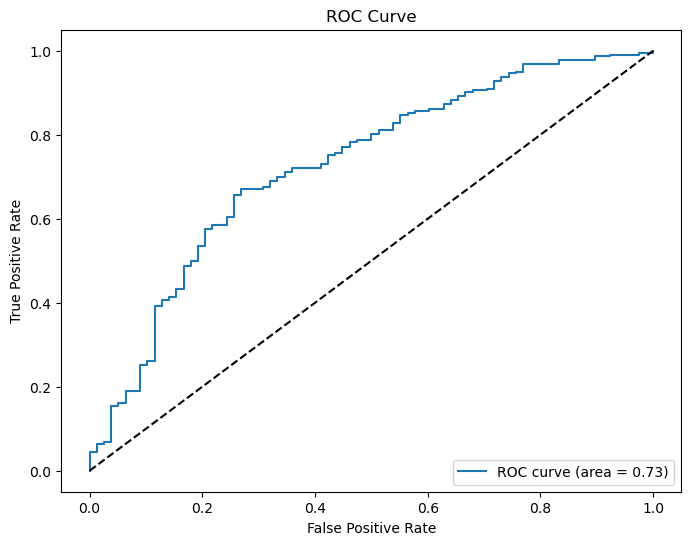

"\nThe AUC for the ROC curve is 0.73, which indicates that the model is moderately effective and has a fair ability to distinguish between the \npositive and negative classes. It's reasonably good at identifying true positives while maintaining a relatively low false positive rate \nbut it is not exceptionally strong overall.\n"

In [19]:
# Plot the ROC curve
plt.figure(figsize=[8, 6])

# Plot the ROC curve line
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')

# Plot a diagonal line representing a random classifier (AUC = 0.5)
plt.plot([0, 1], [0, 1], 'k--')

# Set the labels and title of the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Add a legend to the plot
plt.legend(loc="lower right")

plt.show()
'''
The AUC for the ROC curve is 0.73, which indicates that the model is moderately effective and has a fair ability to distinguish between the 
positive and negative classes. It's reasonably good at identifying true positives while maintaining a relatively low false positive rate 
but it is not exceptionally strong overall.
'''